In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
movies = pd.read_csv(r"Movies.csv", encoding='latin-1')

movies

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
movies.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [22]:
movies.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [23]:
movies.describe

<bound method NDFrame.describe of                                      Name    Year Duration            Genre  \
0                                             NaN      NaN            Drama   
1      #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                             #Homecoming  (2021)   90 min   Drama, Musical   
3                                 #Yaaram  (2019)  110 min  Comedy, Romance   
4                       ...And Once Again  (2010)  105 min            Drama   
...                                   ...     ...      ...              ...   
15504                 Zulm Ko Jala Doonga  (1988)      NaN           Action   
15505                               Zulmi  (1999)  129 min    Action, Drama   
15506                           Zulmi Raj  (2005)      NaN           Action   
15507                       Zulmi Shikari  (1988)      NaN           Action   
15508                        Zulm-O-Sitam  (1998)  130 min    Action, Drama   

       Rating Vot

In [24]:
column_null = movies.isna().sum()
column_null

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [25]:
row_wise = movies.isnull().sum(axis=1)
row_wise

0        4
1        0
2        2
3        0
4        2
        ..
15504    1
15505    0
15506    5
15507    7
15508    0
Length: 15509, dtype: int64

In [26]:
percent_missing = movies.isnull().sum() * 100 / len(movies)
percent_missing

Name         0.000000
Year         3.404475
Duration    53.317429
Genre       12.102650
Rating      48.939326
Votes       48.932878
Director     3.385131
Actor 1     10.426204
Actor 2     15.371720
Actor 3     20.272100
dtype: float64

In [33]:
# Display the current column names
print(movies.columns)

# Now, perform the drop operation with the correct column names
columns_to_drop = ['Actor 2']

movies = movies.drop(columns_to_drop, axis=1)


Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [37]:
movies["Votes"] = movies.Votes.fillna("8")
movies.Votes.isnull().sum()

0

In [39]:
len(movies.index)/5043

3.0753519730319256

In [42]:
print(movies['Duration'].unique())


[nan '109 min' '90 min' '110 min' '105 min' '147 min' '142 min' '59 min'
 '82 min' '116 min' '96 min' '120 min' '161 min' '166 min' '102 min'
 '87 min' '132 min' '66 min' '146 min' '112 min' '168 min' '158 min'
 '126 min' '94 min' '138 min' '124 min' '144 min' '157 min' '136 min'
 '107 min' '113 min' '80 min' '122 min' '149 min' '148 min' '130 min'
 '121 min' '188 min' '115 min' '103 min' '114 min' '170 min' '100 min'
 '99 min' '140 min' '128 min' '93 min' '125 min' '145 min' '75 min'
 '111 min' '134 min' '85 min' '104 min' '92 min' '137 min' '127 min'
 '150 min' '119 min' '135 min' '86 min' '76 min' '70 min' '72 min'
 '151 min' '95 min' '52 min' '89 min' '143 min' '177 min' '117 min'
 '123 min' '154 min' '88 min' '175 min' '153 min' '78 min' '139 min'
 '133 min' '101 min' '180 min' '60 min' '46 min' '164 min' '162 min'
 '171 min' '160 min' '152 min' '62 min' '163 min' '165 min' '141 min'
 '210 min' '129 min' '156 min' '240 min' '172 min' '155 min' '118 min'
 '167 min' '106 min' '193 m

In [43]:
movies['Duration'] = pd.to_numeric(movies['Duration'], errors='coerce')
movies['duration'] = round(movies['Duration'] / 1000000, 2)


In [45]:
print(movies.columns)


Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 3', 'duration'],
      dtype='object')


<Axes: xlabel='Rating', ylabel='Votes'>

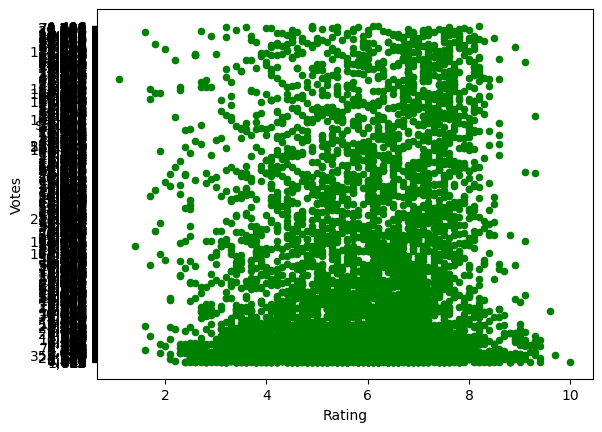

In [47]:
movies.plot(kind='scatter', x='Rating', y='Votes', color='green')


In [50]:
movies = movies.drop_duplicates()